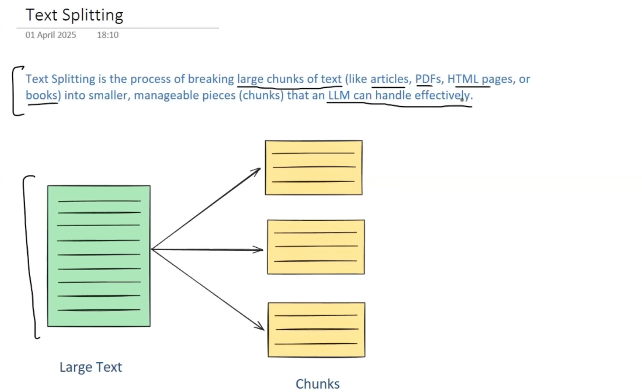

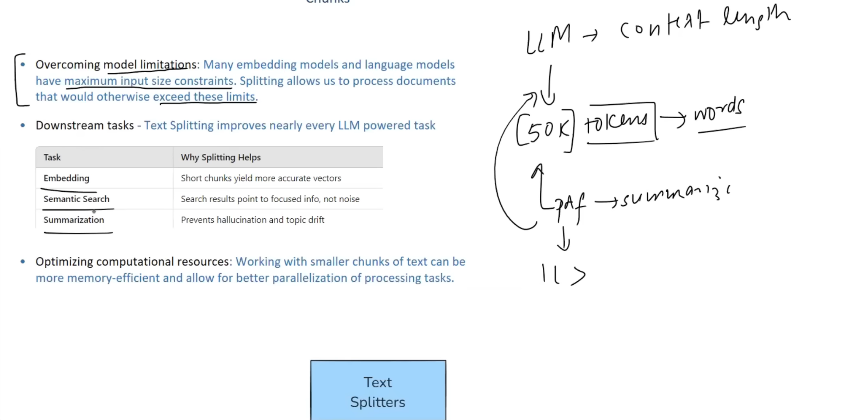

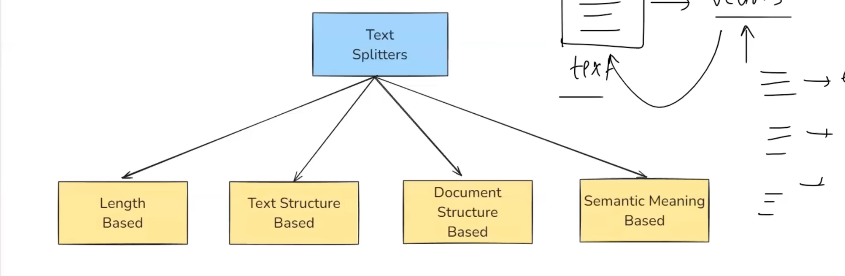

Text splitting is a crucial process in building applications powered by Large Language Models (LLMs), as it addresses limitations and improves the quality of results.

### I. Definition and Rationale for Text Splitting

Text splitting is defined as **the process of breaking large chunks of text**, such as articles, books, PDFs, or HTML pages, **into smaller, manageable pieces** that an LLM can handle effectively. The code that performs this operation is referred to as a text splitter.

It is generally recommended to feed LLMs smaller, divided chunks of text rather than very large texts because this significantly improves the quality of the LLM’s output.

#### A. Key Reasons Text Splitting is Important

1.  **Overcoming Model Limitations (Context Length):** Many embedding and language models have constraints on the maximum input size they can accept. LLMs have a context length limit, restricting how much text they can receive at one time. Text splitting allows developers to process documents that would otherwise exceed these limits (e.g., processing a 100,000-word PDF when the model limit is 50,000 tokens).
2.  **Better Results in Downstream Tasks:** Using text splitting generally leads to better performance in tasks crucial for LLM applications, including:
    *   **Embedding:** When converting text to vectors (embeddings), small chunks capture the semantic meaning more effectively than a single vector generated from a massive text. High-quality embeddings are difficult to create from very large texts.
    *   **Semantic Search:** Semantic search results are more precise and improved when performed on chunks created via text splitting, compared to searching a single large document.
    *   **Summarization:** LLMs are "not that great" with bigger texts during summarization, sometimes leading to drifting or hallucinations (saying things not in the document). Text splitting is empirically proven to yield better summarization results.
3.  **Optimizing Computational Resources:** Working with smaller chunks is more memory efficient and allows for better parallelization of processing tasks, thereby reducing computational requirements.

### II. Types of Text Splitting Techniques

The sources detail four main categories of text splitting, moving from the simplest to the most complex:

| Category | Basis for Splitting | LangChain Example |
| :--- | :--- | :--- |
| **1. Length-Based** | Document length (characters or tokens) | `CharacterTextSplitter` |
| **2. Text Structure-Based** | Hierarchy of text organization (paragraphs, sentences) | `RecursiveCharacterTextSplitter` |
| **3. Document Structure-Based** | Specialized format structure (e.g., code, markup) | `RecursiveCharacterTextSplitter.from_language` |
| **4. Semantic Meaning-Based** | Meaning and topic shifts | `SemanticChunker` (Experimental) |

---

#### 1. Length-Based Text Splitting (Character Text Splitter)

This is the fastest and most simple method conceptually and to implement.

*   **Mechanism:** The user predefines the chunk size (e.g., 100 characters). The text is traversed, and when the size limit is reached, a chunk is created regardless of linguistic structure, and the process resumes from the cutoff point. This can be based on characters or tokens.
*   **Disadvantage:** This approach does not consider the text's linguistic structure, grammar, or semantic meaning. The text may be cut mid-word, mid-sentence, or mid-paragraph, which can lead to incomplete semantic meaning capture for tasks like embedding.
*   **Implementation:** In LangChain, the `CharacterTextSplitter` class is used, requiring the specification of `chunk_size` and `chunk_overlap`.

##### Chunk Overlap

A critical parameter in splitting is **chunk overlap**, which determines the number of characters that will be shared between two consecutive chunks.

*   **Purpose:** Overlap helps to retain context that might be lost when the text is abruptly cut, ensuring that context is passed on to the subsequent chunk.
*   **Trade-off:** While high overlap keeps contexts similar, it increases the number of chunks, requiring more computation.
*   **Recommendation:** For RAG-based applications, an overlap of 10% to 20% of the chunk size is typically considered a good range.

#### 2. Text Structure-Based Text Splitting (Recursive Character Text Splitting)

This technique leverages the hierarchical structure of text (paragraphs $\rightarrow$ sentences $\rightarrow$ words $\rightarrow$ characters). This is one of the most commonly used techniques.

*   **Mechanism:** It defines a set of separators (e.g., paragraph breaks `\n\n`, line changes `\n`, spaces, and finally, nothing for characters). The algorithm is recursive:
    1.  It attempts to split the text using the highest-level separator (e.g., paragraphs).
    2.  If the resulting chunks are still larger than the allowed `chunk_size`, it moves down to the next separator level (e.g., sentences).
    3.  If the chunks produced are too small, the algorithm attempts to merge them based on the separators to get closer to the allowed `chunk_size` without exceeding it.
*   **Advantage:** This algorithm consistently attempts to avoid abrupt splitting, especially at the word level, making it superior to simple character splitting. It adapts to the chunk size; a larger size may result in splitting at the paragraph level, while a smaller size forces splitting at the sentence or word level.

#### 3. Document-Based Text Splitting (Specialized Structure)

This is an extension of the Recursive Character Text Splitting idea, applied to specialized document types that are not plain language text.

*   **Application:** It is used for documents like code (e.g., Python, JavaScript, Java, PHP) or markup languages (e.g., Markdown, HTML).
*   **Mechanism:** It employs the Recursive Character Text Splitting algorithm but uses a different set of separators specifically tailored to the document structure. For example, when splitting Python code, the algorithm uses keywords like `class` and `def` (for functions) as separators, followed by the normal hierarchy.
*   **Implementation:** In LangChain, the `RecursiveCharacterTextSplitter.from_language` method is used, requiring the language (e.g., `Language.PYTHON` or `Language.MARKDOWN`) to be specified along with the `chunk_size` and `chunk_overlap`.

#### 4. Semantic Meaning-Based Text Splitting

This approach decides split points based on the underlying meaning of the text, rather than physical length or structure. The objective is to split where a topic change or shift in meaning occurs.

*   **Mechanism:**
    1.  The text is first broken down into smaller units, such as sentences (S1, S2, S3).
    2.  An embedding model (like OpenAI’s) is used to generate vector embeddings for each sentence.
    3.  The algorithm then compares the similarity (e.g., cosine similarity) between consecutive sentences (S1/S2, S2/S3).
    4.  A sudden, significant drop in similarity indicates an abrupt topic change, which is then chosen as the splitting point. This process uses a sliding window approach.
*   **Status:** This concept is promising, especially as embedding models improve. However, currently, these semantic text splitters (like LangChain's `SemanticChunker`) are in the experimental stage, are not part of the main library, and have not yet demonstrated consistently accurate performance.
*   **Thresholds:** To determine a "significant drop" in similarity, the splitter uses a threshold type, which can be based on statistical measures such as standard deviation, percentile, interquartiles, or gradient.

***

**Conclusion:** Among the methods discussed, the **Recursive Character Text Splitter** is generally considered the best and most widely used option currently available.

---
*Analogy:* Imagine text splitting as tailoring a long roll of fabric (your massive document) for use in creating various clothes (LLM tasks).
1. **Length-Based Splitting** is like cutting the fabric every 10 inches with scissors—it's fast, but you might cut right through the middle of a pattern or a seam.
2. **Recursive Character Splitting** is like having a skilled tailor who first tries to cut along the predetermined pattern lines (paragraphs), and if those pieces are too big, they cut along the hem lines (sentences), ensuring you don't cut through the middle of a vital piece of the design (a word or context).
3. **Semantic Meaning-Based Splitting** is like having an AI tailor who analyzes the fabric's pattern and color palette to ensure that pieces dealing with the "blue flower" design are separated from pieces dealing with the "red stripe" design, regardless of where the physical seams are.



### I. Challenges and Problems with Large Texts

The core challenge is that directly processing very large documents (like PDFs, articles, or books) using LLMs yields poor quality results and is computationally inefficient.

| Challenge Category | Specific Problem | Consequence (The Sources Detail) |
| :--- | :--- | :--- |
| **Model Limitations** | **Context Length Constraint:** LLMs and embedding models have a limit on the maximum input size (e.g., 50,000 tokens) they can receive at one time. | Documents exceeding this limit (e.g., 100,000 words) cannot be processed, and summarization tasks fail. |
| **Quality of Output** | **Poor Embedding Quality:** Generating a single vector (embedding) from a very large text struggles to capture the full semantic meaning accurately. | The resultant vector does not effectively represent the text, reducing the accuracy of downstream tasks. |
| **Downstream Task Performance** | **Imprecise Semantic Search:** Semantic search results are less precise when performed on a single large document compared to divided chunks. | Search quality is "not that great" when dealing with large texts. |
| **LLM Summarization Issues:** LLMs are "not that great" with bigger texts during summarization. | The LLM may "drift" (go off-topic) or "hallucinate" (saying things not in the document). |
| **Computational Overhead** | **Inefficiency:** Processing large, monolithic texts requires significant resources. | This increases computational requirements, uses more memory, and limits the ability to parallelize tasks. |
| **Linguistic/Semantic Coherence** | **Abrupt Cuts (Simple Splitting):** Simple splitting methods cut text mid-word, mid-sentence, or mid-paragraph, disregarding linguistic structure. | This abrupt cutting leads to a loss of context, incomplete semantic meaning capture, and negatively impacts embedding quality because half the information might be in one chunk and half in another. |
| **Topic Mixing (Structure-Based):** Structure-based splitters might group unrelated topics if they happen to fall within the same structured unit (like a large paragraph). | A single chunk may contain two completely separate topics (e.g., agriculture and IPL), which reduces the quality of the generated embedding for that chunk. |

***

### II. Solutions: Text Splitting Techniques

The primary solution to all these challenges is **Text Splitting**, the process of breaking down large texts into smaller, manageable chunks. The sources discuss four main categories of text splitting, moving from simplest (fastest) to most sophisticated (context-aware):

#### A. Length-Based Text Splitting (Solution to Context Length and Speed)

*   **Mechanism:** Splits text strictly based on a predefined **chunk size** (number of characters or tokens). It is the simplest and fastest method.
*   **Drawback (Challenge Remaining):** This method fails to consider linguistic structure, potentially cutting words or sentences mid-way, leading to incomplete semantic meaning.
*   **Refinement Solution: Chunk Overlap:** To mitigate the loss of context caused by abrupt cuts, text splitters use **chunk overlap**. This parameter determines the number of characters shared between two consecutive chunks. Overlap helps retain context that might otherwise be lost, ensuring it is passed on to the subsequent chunk. For RAG-based applications, an overlap of **10% to 20%** of the chunk size is recommended.

#### B. Text Structure-Based Text Splitting (Solution to Abrupt Cuts/Context Loss)

*   **Technique:** **Recursive Character Text Splitting**.
*   **Mechanism:** This technique acknowledges the hierarchical structure of text (paragraphs $\rightarrow$ sentences $\rightarrow$ words $\rightarrow$ characters) and leverages a sequence of separators. It attempts to split using the highest-level separator (e.g., paragraph breaks) first. If the resulting chunks are still too large, it recursively attempts lower-level separators (lines, then spaces, then characters). If chunks are too small, the algorithm attempts to merge them back up to the allowed size.
*   **Advantage (Solution):** This approach consistently tries to **avoid abrupt splits** at the word level, making it superior to simple character splitting and better preserving contextual meaning. This is considered one of the most widely used and best techniques currently available.

#### C. Document Structure-Based Splitting (Solution for Non-Plain Text Documents)

*   **Technique:** An extension of Recursive Character Text Splitting, adapted for specialized formats.
*   **Application:** Used for non-plain text documents, such as **Python code, JavaScript, Java, PHP, Markdown, or HTML**.
*   **Mechanism (Solution):** Instead of using standard paragraph/sentence separators, this method employs specific separators tailored to the document's structure (e.g., `class` or `def` keywords for Python code, or markdown headings). This ensures that structural units within the specialized document (like a code class or a heading section) remain intact in a single chunk.

#### D. Semantic Meaning-Based Text Splitting (Solution to Topic Mixing)

*   **Technique:** **Semantic Chunking**.
*   **Mechanism:** This technique ignores physical structure and splits text based on the underlying meaning. It breaks text into units (like sentences), generates **vector embeddings** for each unit, and then compares the similarity (e.g., cosine similarity) between consecutive sentences.
*   **Solution:** A **sudden, significant drop in similarity** indicates an abrupt topic change (e.g., the text shifts from discussing agriculture to IPL), and this point is chosen as the splitting boundary. This allows for the creation of chunks that are semantically coherent, even if they were grouped in the original structure.
*   **Status (Challenge Remaining):** While promising, this method is currently considered **experimental** and has not yet demonstrated consistently accurate performance.

In essence, Text Splitting serves as a digital tailor, ensuring that large documents are cut into pieces appropriate for the LLM's capacity, enhancing computational efficiency, and, most importantly, preserving the integrity of the semantic context so that the model can understand and utilize the information effectively.



---

## 🧩 **Text Splitting Techniques — Summary Notes**

### **1️⃣ Length-Based Splitting (Character Text Splitter)**

**Concept:**

* Splits text purely by **character or token count**.
* Ignores grammar, words, and meaning.

**Parameters:**

* **Chunk size:** Fixed number of characters (e.g., 100).
* **Chunk overlap:** Shared characters between chunks (e.g., 10–20%) to retain context.

**Example:**

> “My name is Nitish and I love AI.” with chunk size = 10 →
> Chunks: “My name is ” | “e is Nitish” | “tish and I ” | “and I love” | “ I love AI.”

**Outcome:**

* Fast and simple.
* May split mid-word or mid-sentence.

---

### **2️⃣ Text Structure-Based Splitting (Recursive Character Splitter)**

**Concept:**

* Splits text hierarchically based on **linguistic structure**:
  Paragraph → Sentence → Word → Character.
* Tries to keep chunks whole at the highest possible level under the limit.

**Example Scenarios:**

| Chunk Size | Result                                         |
| :--------- | :--------------------------------------------- |
| 50 chars   | Uses **paragraph** breaks → 2 chunks           |
| 25 chars   | Uses **sentence** breaks → 4 chunks            |
| 10 chars   | Uses **word** boundaries → smaller word groups |

**Outcome:**

* More natural splits (aligned with text meaning).
* Balances context and size efficiently.

---

### **3️⃣ Document Structure-Based Splitting (Specialized Splitter)**

**Concept:**

* Extends recursive method using **format-specific separators** for structured docs.

**Examples:**

| Document Type    | Separators / Logic         | Result                                      |
| :--------------- | :------------------------- | :------------------------------------------ |
| **Python code**  | `class`, `def`, etc.       | One chunk per class/function or logic block |
| **Markdown**     | Headings (`#`, `##`, etc.) | Each section forms a chunk                  |
| **HTML/JS/Java** | Uses tags or block syntax  | Keeps related blocks together               |

**Outcome:**

* Ideal for **code, Markdown, or structured documents**.
* Maintains logical boundaries for better understanding.

---

### **4️⃣ Semantic Meaning-Based Splitting (Semantic Chunking)**

**Concept:**

* Splits text based on **topic or meaning changes** instead of length.
* Uses **sentence embeddings** to detect topic shifts.

**Mechanism:**

1. Break text into **sentences** (S1, S2, S3…).
2. Generate **vector embeddings** for each.
3. Measure **semantic similarity** between adjacent sentences.
4. If similarity drops beyond a **threshold**, insert a split.

**Example:**

* Paragraph 1: Agriculture → IPL.
* Paragraph 2: Terrorism.
  → 3 semantic chunks: [Agriculture], [IPL], [Terrorism].

**Threshold Setting:**

* Based on **standard deviation**, **percentile**, or **gradient** of similarity scores.

**Outcome:**

* Contextually meaningful chunks.
* Ideal for topic-aware retrieval, summarization, or search.
* Still experimental (e.g., LangChain’s `SemanticChunker`).

---

### 🧠 **Summary Table**

| Type                         | Basis                      | Example Use          | Pros                    | Cons                      |
| :--------------------------- | :------------------------- | :------------------- | :---------------------- | :------------------------ |
| **Length-based**             | Fixed character count      | Simple splitting     | Fast, easy              | May break words/sentences |
| **Text structure-based**     | Paragraphs/sentences       | Articles, essays     | Preserves flow          | Slightly complex          |
| **Document structure-based** | Format-specific separators | Code, Markdown       | Keeps logical structure | Needs parser setup        |
| **Semantic-based**           | Topic changes (embeddings) | Meaningful retrieval | Context-aware           | Computationally heavy     |

---





---

# 🧩 Text Splitting Techniques — With Code and Examples

---

## **1️⃣ Length-Based Text Splitting**

**📘 Concept:**
Splits text purely by **character or token count**, ignoring sentence or word structure.

**🧠 Use Case:** Simple and fast — good for basic chunking before embedding.

### ✅ **Code Example**

```python
from langchain.text_splitter import CharacterTextSplitter

text = "My name is Nitish. I love working with AI models and building NLP tools."

# Define the splitter
splitter = CharacterTextSplitter(
    separator=" ",       # split by space
    chunk_size=30,       # max 30 characters
    chunk_overlap=5       # overlap of 5 chars
)

chunks = splitter.split_text(text)
print(chunks)
```

### 🧩 **Output**

```python
[
 'My name is Nitish. I love',
 've working with AI models',
 'odels and building NLP too',
 'LP tools.'
]
```

**🧾 Notes:**

* Simple, length-based slicing.
* Overlap preserves partial context.
* May cut words mid-way.

---

## **2️⃣ Text Structure-Based Splitting (Recursive Character Splitter)**

**📘 Concept:**
Splits text using a **hierarchy of natural boundaries** — paragraphs → sentences → words → characters.
If a higher-level split (e.g., paragraph) fits, it uses that; otherwise, goes deeper.

**🧠 Use Case:** For natural language texts like articles or essays.

### ✅ **Code Example**

```python
from langchain.text_splitter import RecursiveCharacterTextSplitter

text = (
    "Paragraph one. It has two sentences.\n\n"
    "Paragraph two. It is shorter."
)

splitter = RecursiveCharacterTextSplitter(
    chunk_size=50,
    chunk_overlap=10
)

chunks = splitter.split_text(text)
for i, c in enumerate(chunks):
    print(f"Chunk {i+1}: {c}")
```

### 🧩 **Output**

```
Chunk 1: Paragraph one. It has two sentences.
Chunk 2: Paragraph two. It is shorter.
```

**🧾 Notes:**

* Finds the **best possible boundary** below the limit.
* Preserves sentence integrity when possible.
* More natural results than plain character splitting.

---

## **3️⃣ Document Structure-Based Splitting (Structured Splitter)**

**📘 Concept:**
Uses **language-specific separators** (e.g., `class`, `def`, `<h1>`).
Helps maintain the logical flow of structured documents.

**🧠 Use Case:** Code files, Markdown docs, or HTML.

### ✅ **Code Example (Python Code)**

```python
from langchain.text_splitter import RecursiveCharacterTextSplitter

python_code = """
class Dog:
    def __init__(self, name):
        self.name = name

    def bark(self):
        print(f"{self.name} says woof!")

dog = Dog("Bruno")
dog.bark()
"""

# Use built-in separator set for Python
splitter = RecursiveCharacterTextSplitter.from_language(
    language="python",
    chunk_size=150,
    chunk_overlap=10
)

chunks = splitter.split_text(python_code)
for i, c in enumerate(chunks):
    print(f"Chunk {i+1}:\n{c}\n")
```

### 🧩 **Output**

```
Chunk 1:
class Dog:
    def __init__(self, name):
        self.name = name

    def bark(self):
        print(f"{self.name} says woof!")

Chunk 2:
dog = Dog("Bruno")
dog.bark()
```

**🧾 Notes:**

* Keeps **entire class or function** together.
* Ideal for **code or markdown** logical separation.
* Uses specialized separators per language (`.from_language("python")`).

---

## **4️⃣ Semantic Meaning-Based Splitting (Semantic Chunking)**

**📘 Concept:**
Splits based on **topic or meaning changes**, not characters or sentences.
Uses **embeddings** to measure **semantic similarity** between consecutive parts.

**🧠 Use Case:** Ideal for topic-aware search, retrieval, or summarization.

### ✅ **Code Example**

```python
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai import OpenAIEmbeddings

text = (
    "Farmers are essential to our economy. "
    "Agriculture provides food and jobs. "
    "Yesterday, I watched an IPL cricket match. "
    "It was exciting! "
    "Later, I read a report about global terrorism."
)

# Initialize embedding model
embeddings = OpenAIEmbeddings()

# Semantic splitter
semantic_splitter = SemanticChunker(embeddings)
chunks = semantic_splitter.split_text(text)

for i, c in enumerate(chunks):
    print(f\"Chunk {i+1}: {c}\\n\")
```

### 🧩 **Output**

```
Chunk 1: Farmers are essential to our economy. Agriculture provides food and jobs.
Chunk 2: Yesterday, I watched an IPL cricket match. It was exciting!
Chunk 3: Later, I read a report about global terrorism.
```

**🧾 Notes:**

* Detects **topic boundaries** via embedding similarity drops.
* Threshold determines when to split.
* Computationally heavier but **most context-aware**.

---

## 🧠 **Quick Comparison Table**

| Type                | Splitting Basis              | Example Use          | Strength           | Limitation            |
| ------------------- | ---------------------------- | -------------------- | ------------------ | --------------------- |
| **Length-based**    | Fixed char/token count       | Quick pre-processing | Simple, fast       | May cut words         |
| **Structure-based** | Paragraph/sentence hierarchy | Articles, essays     | Natural boundaries | Slightly slower       |
| **Document-based**  | Format-specific separators   | Code, Markdown       | Maintains logic    | Requires format info  |
| **Semantic-based**  | Topic/meaning changes        | Retrieval, search    | Meaningful chunks  | Computationally heavy |

---


